# Set up

In [8]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [9]:
df = pd.read_csv("data/Telco-Customer-Churn.csv")
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [10]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

# Preprocessing

## MISC

### Drop useless columns

In [11]:
df.drop('customerID', axis='columns', inplace=True)
df.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Dealing with numeric columns

### Converting string to numeric

In [12]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [13]:
pd.to_numeric(df.TotalCharges) #fail because of null values

ValueError: Unable to parse string " " at position 488

In [14]:
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()] #Filters out all records with null

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [15]:
# removes the null values
df1 = df[df.TotalCharges!=' ']

#convert
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)

C:\Users\jonas\AppData\Local\Temp\ipykernel_20556\1821939836.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.TotalCharges = pd.to_numeric(df1.TotalCharges)


### Scaling the data

In [16]:
df1.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [17]:
from sklearn.preprocessing import MinMaxScaler

cols_to_scale = ['tenure', 'MonthlyCharges', 'TotalCharges']
scaler = MinMaxScaler()
df1[cols_to_scale] = scaler.fit_transform(df1[cols_to_scale])

df1[cols_to_scale].head(5)

C:\Users\jonas\AppData\Local\Temp\ipykernel_20556\3859925983.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[cols_to_scale] = scaler.fit_transform(df1[cols_to_scale])


,tenure,MonthlyCharges,TotalCharges
0,0.000000,0.115423,0.001275
1,0.464789,0.385075,0.215867
2,0.014085,0.354229,0.010310
3,0.619718,0.239303,0.210241
4,0.014085,0.521891,0.015330


## Dealing with string columns

### Checking the data

In [18]:
def print_unique_col_values(df):
       for column in df:
            if df[column].dtypes=='object':
                print(f'{column}: {df[column].unique()}') 

In [19]:
print_unique_col_values(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


### Convert yes, no and no equivilants into binary (1,0)

In [20]:
df1.replace('No internet service','No',inplace=True)
df1.replace('No phone service','No',inplace=True)

C:\Users\jonas\AppData\Local\Temp\ipykernel_20556\2045096646.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No internet service','No',inplace=True)
C:\Users\jonas\AppData\Local\Temp\ipykernel_20556\2045096646.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No phone service','No',inplace=True)


In [21]:
print_unique_col_values(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [22]:
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for col in yes_no_columns:
    df1[col].replace({'Yes': 1,'No': 0},inplace=True)

C:\Users\jonas\AppData\Local\Temp\ipykernel_20556\1648037665.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col].replace({'Yes': 1,'No': 0},inplace=True)


In [23]:
for col in df1:
    print(f'{col}: {df1[col].unique()}') 

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1]
On

In [24]:
df1.gender.replace({'Female':1, 'Male':0},inplace=True)

C:\Users\jonas\AppData\Local\Temp\ipykernel_20556\3035418721.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.gender.replace({'Female':1, 'Male':0},inplace=True)


In [25]:
for col in df1:
    print(f'{col}: {df1[col].unique()}') 

gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1]
OnlineBackup: 

### One Hot Encoding

In [26]:
df2 = pd.get_dummies(data=df1, columns=['InternetService','Contract','PaymentMethod'])
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

## Results

In [27]:
df2.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,0.000000,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,0.464789,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,0.014085,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,0.619718,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,0.014085,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [28]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                     float64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

# Model

## Train Test Split

In [29]:
X = df2.drop('Churn', axis='columns')
y = df2.Churn

from sklearn.model_selection import train_test_split

# Split the data into training and temporary data (remaining data)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)

# Split the temporary data into validation and test sets
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Print the shapes of the resulting sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Validation set shape:", X_val.shape, y_val.shape)
print("Test set shape:", X_test.shape, y_test.shape)

Training set shape: (4219, 26) (4219,)
Validation set shape: (1406, 26) (1406,)
Test set shape: (1407, 26) (1407,)


## Model Building

In [30]:
X_train.columns.shape

(26,)

In [31]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(20, input_shape= (26,), activation = 'relu'),
    keras.layers.Dense(15, activation= 'relu'),
    keras.layers.Dense(5, activation= 'relu'),
    keras.layers.Dense(1, activation= 'sigmoid')
])

model.compile(optimizer='adam',
                loss = 'binary_crossentropy',
                metrics = ['accuracy'])

In [32]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=200, batch_size=32)

Epoch 1/200
132/132 [==============================] - 3s 7ms/step - loss: 0.5660 - accuracy: 0.7011 - val_loss: 0.4763 - val_accuracy: 0.7354
Epoch 2/200
132/132 [==============================] - 0s 3ms/step - loss: 0.4538 - accuracy: 0.7499 - val_loss: 0.4586 - val_accuracy: 0.7888
Epoch 3/200
132/132 [==============================] - 0s 3ms/step - loss: 0.4380 - accuracy: 0.7872 - val_loss: 0.4475 - val_accuracy: 0.7817
Epoch 4/200
132/132 [==============================] - 0s 3ms/step - loss: 0.4312 - accuracy: 0.7919 - val_loss: 0.4473 - val_accuracy: 0.7930
Epoch 5/200
132/132 [==============================] - 0s 3ms/step - loss: 0.4261 - accuracy: 0.7966 - val_loss: 0.4412 - val_accuracy: 0.7838
Epoch 6/200
132/132 [==============================] - 0s 4ms/step - loss: 0.4224 - accuracy: 0.7997 - val_loss: 0.4405 - val_accuracy: 0.7838
Epoch 7/200
132/132 [==============================] - 0s 3ms/step - loss: 0.4190 - accuracy: 0.8016 - val_loss: 0.4395 - val_accuracy: 0.7881

## Evaluation

In [33]:
model.evaluate(X_test, y_test)

44/44 [==============================] - 0s 2ms/step - loss: 0.6338 - accuracy: 0.7633


[0.6338372826576233, 0.7633262276649475]

### Confusion Matrix

In [34]:
yp = model.predict(X_test)

y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

44/44 [==============================] - 0s 2ms/step


In [35]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84      1045
           1       0.54      0.53      0.54       362

    accuracy                           0.76      1407
   macro avg       0.69      0.69      0.69      1407
weighted avg       0.76      0.76      0.76      1407



Text(95.72222222222221, 0.5, 'Truth')

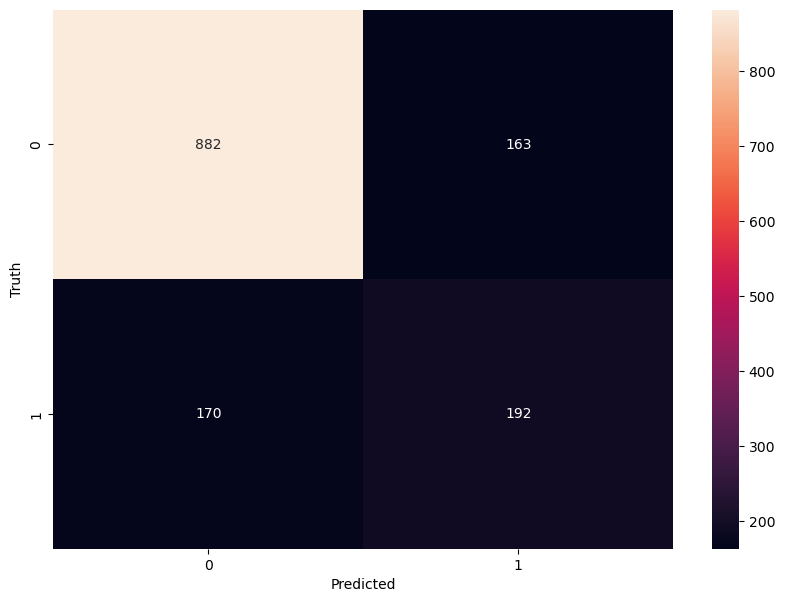

In [36]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

### Loss and Validation

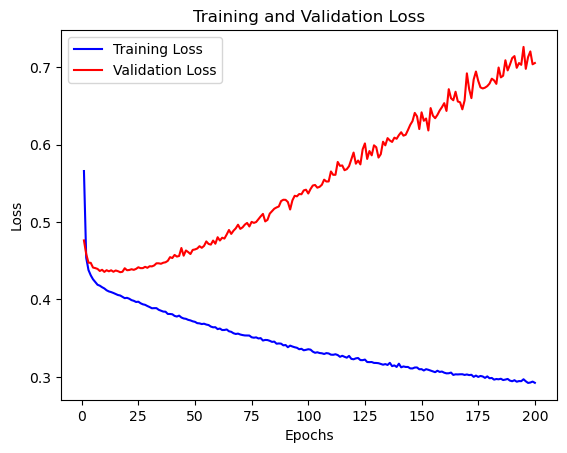

In [37]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(train_loss) + 1)

plt.plot(epochs, train_loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

1. Overfitting as training loss is decreasing but validation loss is stagnant
2. Unreprestative split between training and validation data (gap is big)

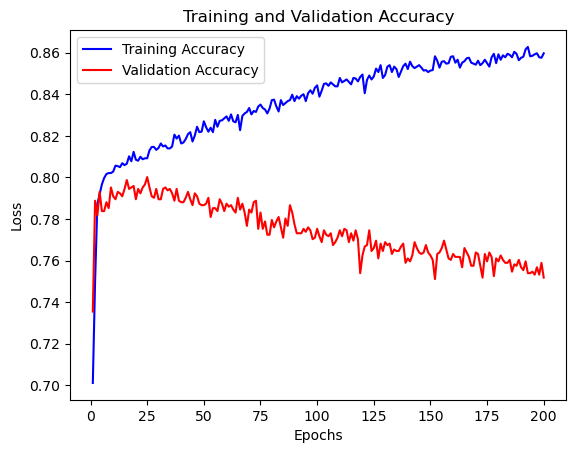

In [38]:
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(train_loss) + 1)

plt.plot(epochs, train_acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Handling inbalanced dataset

##  0. Original results

In [40]:
df2.Churn.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [42]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84      1045
           1       0.54      0.53      0.54       362

    accuracy                           0.76      1407
   macro avg       0.69      0.69      0.69      1407
weighted avg       0.76      0.76      0.76      1407



### Preparation

In [43]:
class_count_0, class_count_1 = df2.Churn.value_counts()

df_class_0 = df2[df2.Churn == 0]
df_class_1 = df2[df2.Churn == 1]

In [49]:
print(df_class_0.shape)
df_class_0.head(5)

(5163, 27)


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,0.000000,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,0.464789,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
3,0,0,0,0,0.619718,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
6,0,0,0,1,0.295775,1,1,0,1,0,...,0,1,0,1,0,0,0,1,0,0
7,1,0,0,0,0.126761,0,0,1,0,0,...,1,0,0,1,0,0,0,0,0,1


In [50]:
print(df_class_1.shape)
df_class_1.head(5)

(1869, 27)


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2,0,0,0,0,0.014085,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
4,1,0,0,0,0.014085,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
5,1,0,0,0,0.098592,1,1,0,0,1,...,0,1,0,1,0,0,0,0,1,0
8,1,0,1,0,0.380282,1,1,0,0,1,...,0,1,0,1,0,0,0,0,1,0
13,0,0,0,0,0.676056,1,1,0,1,1,...,0,1,0,1,0,0,1,0,0,0


## 1. Undersampling

### 1.1 Undersample the majority

#### Preprocessing the data - undersampling

In [51]:
df3_0_under = df_class_0.sample(class_count_1)
df3_0_under.shape

(1869, 27)

In [52]:
df3 = pd.concat([df3_0_under, df_class_1], axis=0)

print(df3.shape)
df3.head(5)

(3738, 27)


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2914,0,0,0,0,0.436620,1,0,0,0,0,...,1,0,0,0,1,0,1,0,0,0
2476,0,0,1,0,0.957746,1,0,1,1,1,...,1,0,0,0,0,1,0,0,0,1
3353,0,0,1,0,0.154930,1,0,0,1,0,...,0,1,0,1,0,0,0,1,0,0
6171,1,1,1,1,0.816901,1,1,0,0,1,...,0,1,0,1,0,0,0,1,0,0
5513,1,1,0,0,0.929577,1,0,1,1,0,...,0,1,0,0,0,1,1,0,0,0


#### Model

In [53]:
X = df3.drop('Churn', axis='columns')
y = df3.Churn

# Split the data into training and temporary data (remaining data)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)

# Split the temporary data into validation and test sets
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

model = keras.Sequential([
    keras.layers.Dense(20, input_shape= (26,), activation = 'relu'),
    keras.layers.Dense(15, activation= 'relu'),
    keras.layers.Dense(5, activation= 'relu'),
    keras.layers.Dense(1, activation= 'sigmoid')
])

model.compile(optimizer='adam',
                loss = 'binary_crossentropy',
                metrics = ['accuracy'])

history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, batch_size=32)

yp = model.predict(X_test)

y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

Epoch 1/100
71/71 [==============================] - 2s 8ms/step - loss: 0.6370 - accuracy: 0.6053 - val_loss: 0.6087 - val_accuracy: 0.6765
Epoch 2/100
71/71 [==============================] - 0s 4ms/step - loss: 0.5916 - accuracy: 0.7199 - val_loss: 0.5843 - val_accuracy: 0.7487
Epoch 3/100
71/71 [==============================] - 0s 4ms/step - loss: 0.5737 - accuracy: 0.7556 - val_loss: 0.5710 - val_accuracy: 0.7594
Epoch 4/100
71/71 [==============================] - 0s 4ms/step - loss: 0.5641 - accuracy: 0.7609 - val_loss: 0.5625 - val_accuracy: 0.7634
Epoch 5/100
71/71 [==============================] - 0s 4ms/step - loss: 0.5545 - accuracy: 0.7636 - val_loss: 0.5560 - val_accuracy: 0.7634
Epoch 6/100
71/71 [==============================] - 0s 4ms/step - loss: 0.5465 - accuracy: 0.7569 - val_loss: 0.5524 - val_accuracy: 0.7607
Epoch 7/100
71/71 [==============================] - 0s 4ms/step - loss: 0.5422 - accuracy: 0.7600 - val_loss: 0.5441 - val_accuracy: 0.7674
Epoch 8/100
7

#### Results for undersampling the majority

In [54]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.70      0.73       395
           1       0.69      0.75      0.72       353

    accuracy                           0.72       748
   macro avg       0.72      0.72      0.72       748
weighted avg       0.73      0.72      0.72       748



### 1.2 Ensemble - Have n models of size of minority and take majority vote

#### Preprocessing data - ensemble

In [55]:
def get_train_batch(df_majority, df_minority, start, end):
    df_train = pd.concat([df_majority[start:end], df_minority], axis=0)

    X_train = df_train.drop('Churn', axis='columns')
    y_train = df_train.Churn
    return X_train, y_train   

In [57]:
df2.Churn.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [59]:
5163/1869

1869

#### Model

##### Model 1

In [74]:
X, y = get_train_batch(df_class_0, df_class_1, 0, class_count_1)

# Split the data into training and temporary data (remaining data)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)

# Split the temporary data into validation and test sets
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

model = keras.Sequential([
    keras.layers.Dense(20, input_shape= (26,), activation = 'relu'),
    keras.layers.Dense(15, activation= 'relu'),
    keras.layers.Dense(5, activation= 'relu'),
    keras.layers.Dense(1, activation= 'sigmoid')
])

model.compile(optimizer='adam',
                loss = 'binary_crossentropy',
                metrics = ['accuracy'])

history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, batch_size=32)

yp = model.predict(X_test)

y_pred1 = []
for element in yp:
    if element > 0.5:
        y_pred1.append(1)
    else:
        y_pred1.append(0)

Epoch 1/100
71/71 [==============================] - 2s 7ms/step - loss: 0.6546 - accuracy: 0.6360 - val_loss: 0.5991 - val_accuracy: 0.7045
Epoch 2/100
71/71 [==============================] - 0s 4ms/step - loss: 0.5509 - accuracy: 0.7382 - val_loss: 0.5434 - val_accuracy: 0.7179
Epoch 3/100
71/71 [==============================] - 0s 4ms/step - loss: 0.5056 - accuracy: 0.7681 - val_loss: 0.5240 - val_accuracy: 0.7380
Epoch 4/100
71/71 [==============================] - 0s 4ms/step - loss: 0.4911 - accuracy: 0.7707 - val_loss: 0.5189 - val_accuracy: 0.7487
Epoch 5/100
71/71 [==============================] - 0s 4ms/step - loss: 0.4850 - accuracy: 0.7752 - val_loss: 0.5162 - val_accuracy: 0.7326
Epoch 6/100
71/71 [==============================] - 0s 4ms/step - loss: 0.4829 - accuracy: 0.7734 - val_loss: 0.5149 - val_accuracy: 0.7299
Epoch 7/100
71/71 [==============================] - 0s 4ms/step - loss: 0.4782 - accuracy: 0.7748 - val_loss: 0.5113 - val_accuracy: 0.7313
Epoch 8/100
7

In [75]:
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.75      0.74      0.75       395
           1       0.71      0.72      0.72       353

    accuracy                           0.73       748
   macro avg       0.73      0.73      0.73       748
weighted avg       0.73      0.73      0.73       748



##### Model 2

In [76]:
X, y = get_train_batch(df_class_0, df_class_1, class_count_1+1, class_count_1*2+1)

X.shape

(3738, 26)

In [77]:
# Split the data into training and temporary data (remaining data)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)

# Split the temporary data into validation and test sets
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

model = keras.Sequential([
    keras.layers.Dense(20, input_shape= (26,), activation = 'relu'),
    keras.layers.Dense(15, activation= 'relu'),
    keras.layers.Dense(5, activation= 'relu'),
    keras.layers.Dense(1, activation= 'sigmoid')
])

model.compile(optimizer='adam',
                loss = 'binary_crossentropy',
                metrics = ['accuracy'])

history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, batch_size=32)

yp = model.predict(X_test)

y_pred2 = []
for element in yp:
    if element > 0.5:
        y_pred2.append(1)
    else:
        y_pred2.append(0)

Epoch 1/100
71/71 [==============================] - 2s 8ms/step - loss: 0.6490 - accuracy: 0.5977 - val_loss: 0.6188 - val_accuracy: 0.6711
Epoch 2/100
71/71 [==============================] - 0s 4ms/step - loss: 0.5952 - accuracy: 0.7324 - val_loss: 0.5872 - val_accuracy: 0.7313
Epoch 3/100
71/71 [==============================] - 0s 4ms/step - loss: 0.5731 - accuracy: 0.7556 - val_loss: 0.5722 - val_accuracy: 0.7460
Epoch 4/100
71/71 [==============================] - 0s 4ms/step - loss: 0.5608 - accuracy: 0.7632 - val_loss: 0.5675 - val_accuracy: 0.7326
Epoch 5/100
71/71 [==============================] - 0s 4ms/step - loss: 0.5505 - accuracy: 0.7623 - val_loss: 0.5561 - val_accuracy: 0.7433
Epoch 6/100
71/71 [==============================] - 0s 4ms/step - loss: 0.5401 - accuracy: 0.7623 - val_loss: 0.5423 - val_accuracy: 0.7527
Epoch 7/100
71/71 [==============================] - 0s 4ms/step - loss: 0.5081 - accuracy: 0.7672 - val_loss: 0.5228 - val_accuracy: 0.7447
Epoch 8/100
7

In [78]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.76      0.71      0.73       395
           1       0.70      0.75      0.72       353

    accuracy                           0.73       748
   macro avg       0.73      0.73      0.73       748
weighted avg       0.73      0.73      0.73       748



##### Model 3

In [72]:
X, y = get_train_batch(df_class_0, df_class_1, class_count_0-class_count_1, class_count_0)

X.shape

(3738, 26)

In [73]:
# Split the data into training and temporary data (remaining data)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)

# Split the temporary data into validation and test sets
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

model = keras.Sequential([
    keras.layers.Dense(20, input_shape= (26,), activation = 'relu'),
    keras.layers.Dense(15, activation= 'relu'),
    keras.layers.Dense(5, activation= 'relu'),
    keras.layers.Dense(1, activation= 'sigmoid')
])

model.compile(optimizer='adam',
                loss = 'binary_crossentropy',
                metrics = ['accuracy'])

history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, batch_size=32)

yp = model.predict(X_test)

y_pred3 = []
for element in yp:
    if element > 0.5:
        y_pred3.append(1)
    else:
        y_pred3.append(0)

Epoch 1/100
71/71 [==============================] - 2s 7ms/step - loss: 0.6645 - accuracy: 0.5990 - val_loss: 0.6182 - val_accuracy: 0.7286
Epoch 2/100
71/71 [==============================] - 0s 4ms/step - loss: 0.5583 - accuracy: 0.7484 - val_loss: 0.5198 - val_accuracy: 0.7527
Epoch 3/100
71/71 [==============================] - 0s 4ms/step - loss: 0.5055 - accuracy: 0.7654 - val_loss: 0.5049 - val_accuracy: 0.7620
Epoch 4/100
71/71 [==============================] - 0s 4ms/step - loss: 0.4920 - accuracy: 0.7756 - val_loss: 0.4923 - val_accuracy: 0.7727
Epoch 5/100
71/71 [==============================] - 0s 4ms/step - loss: 0.4877 - accuracy: 0.7743 - val_loss: 0.4884 - val_accuracy: 0.7634
Epoch 6/100
71/71 [==============================] - 0s 4ms/step - loss: 0.4841 - accuracy: 0.7743 - val_loss: 0.4860 - val_accuracy: 0.7674
Epoch 7/100
71/71 [==============================] - 0s 4ms/step - loss: 0.4796 - accuracy: 0.7761 - val_loss: 0.4925 - val_accuracy: 0.7647
Epoch 8/100
7

In [79]:
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.77      0.64      0.69       395
           1       0.66      0.78      0.71       353

    accuracy                           0.70       748
   macro avg       0.71      0.71      0.70       748
weighted avg       0.71      0.70      0.70       748



#### Results

In [80]:
print(classification_report(y_test, y_pred1))
print(classification_report(y_test, y_pred2))
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.75      0.74      0.75       395
           1       0.71      0.72      0.72       353

    accuracy                           0.73       748
   macro avg       0.73      0.73      0.73       748
weighted avg       0.73      0.73      0.73       748

              precision    recall  f1-score   support

           0       0.76      0.71      0.73       395
           1       0.70      0.75      0.72       353

    accuracy                           0.73       748
   macro avg       0.73      0.73      0.73       748
weighted avg       0.73      0.73      0.73       748

              precision    recall  f1-score   support

           0       0.77      0.64      0.69       395
           1       0.66      0.78      0.71       353

    accuracy                           0.70       748
   macro avg       0.71      0.71      0.70       748
weighted avg       0.71      0.70      0.70       748



In [93]:
# y_pred_sum = y_pred1+y_pred2+y_pred3 this appends and not add up

y_pred_final = y_pred1.copy()
for i in range(len(y_pred1)):
    n_ones = y_pred1[i] + y_pred2[i] + y_pred3[i]
    if n_ones>1:
        y_pred_final[i] = 1
    else:
        y_pred_final[i] = 0

len(y_pred_final)

748

In [94]:
print(classification_report(y_test, y_pred_final))

              precision    recall  f1-score   support

           0       0.80      0.78      0.79       395
           1       0.76      0.78      0.77       353

    accuracy                           0.78       748
   macro avg       0.78      0.78      0.78       748
weighted avg       0.78      0.78      0.78       748



## 2. Oversampling

### 2.1 Oversampling the minority

#### Preprocessing data - oversampling

In [95]:
df2.Churn.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [97]:
df4_1_over = df_class_1.sample(class_count_0, replace=True)

df4_1_over.shape

(5163, 27)

In [98]:
df4 = pd.concat([df_class_0, df4_1_over], axis=0)

df4.shape

(10326, 27)

#### Model

In [99]:
X = df4.drop('Churn', axis='columns')
y = df4.Churn

# Split the data into training and temporary data (remaining data)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)

# Split the temporary data into validation and test sets
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

model = keras.Sequential([
    keras.layers.Dense(20, input_shape= (26,), activation = 'relu'),
    keras.layers.Dense(15, activation= 'relu'),
    keras.layers.Dense(5, activation= 'relu'),
    keras.layers.Dense(1, activation= 'sigmoid')
])

model.compile(optimizer='adam',
                loss = 'binary_crossentropy',
                metrics = ['accuracy'])

history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, batch_size=32)

yp = model.predict(X_test)

y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

Epoch 1/100
194/194 [==============================] - 1s 4ms/step - loss: 0.5886 - accuracy: 0.6993 - val_loss: 0.5177 - val_accuracy: 0.7613
Epoch 2/100
194/194 [==============================] - 0s 1ms/step - loss: 0.4958 - accuracy: 0.7653 - val_loss: 0.5036 - val_accuracy: 0.7617
Epoch 3/100
194/194 [==============================] - 0s 1ms/step - loss: 0.4862 - accuracy: 0.7684 - val_loss: 0.4949 - val_accuracy: 0.7656
Epoch 4/100
194/194 [==============================] - 0s 1ms/step - loss: 0.4809 - accuracy: 0.7703 - val_loss: 0.4892 - val_accuracy: 0.7666
Epoch 5/100
194/194 [==============================] - 0s 1ms/step - loss: 0.4772 - accuracy: 0.7711 - val_loss: 0.4862 - val_accuracy: 0.7690
Epoch 6/100
194/194 [==============================] - 0s 1ms/step - loss: 0.4734 - accuracy: 0.7751 - val_loss: 0.4860 - val_accuracy: 0.7666
Epoch 7/100
194/194 [==============================] - 0s 1ms/step - loss: 0.4711 - accuracy: 0.7755 - val_loss: 0.4834 - val_accuracy: 0.7705

#### Results

In [100]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.72      0.76      1049
           1       0.74      0.82      0.78      1017

    accuracy                           0.77      2066
   macro avg       0.77      0.77      0.77      2066
weighted avg       0.77      0.77      0.77      2066



### 2.2 SMOTE - using KNN to oversample the minority

#### Preprocessing data - smote

In [103]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy = 'minority')

In [106]:
X_pre = df2.drop('Churn',axis='columns')
y_pre = df2['Churn']

X, y = smote.fit_resample(X_pre, y_pre)
y.value_counts()

0    5163
1    5163
Name: Churn, dtype: int64

#### Model

In [107]:

# Split the data into training and temporary data (remaining data)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)

# Split the temporary data into validation and test sets
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

model = keras.Sequential([
    keras.layers.Dense(20, input_shape= (26,), activation = 'relu'),
    keras.layers.Dense(15, activation= 'relu'),
    keras.layers.Dense(5, activation= 'relu'),
    keras.layers.Dense(1, activation= 'sigmoid')
])

model.compile(optimizer='adam',
                loss = 'binary_crossentropy',
                metrics = ['accuracy'])

history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, batch_size=32)

yp = model.predict(X_test)

y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

Epoch 1/100
194/194 [==============================] - 1s 2ms/step - loss: 0.6014 - accuracy: 0.6633 - val_loss: 0.5034 - val_accuracy: 0.7724
Epoch 2/100
194/194 [==============================] - 0s 1ms/step - loss: 0.4802 - accuracy: 0.7698 - val_loss: 0.4807 - val_accuracy: 0.7787
Epoch 3/100
194/194 [==============================] - 0s 1ms/step - loss: 0.4657 - accuracy: 0.7730 - val_loss: 0.4759 - val_accuracy: 0.7816
Epoch 4/100
194/194 [==============================] - 0s 1ms/step - loss: 0.4568 - accuracy: 0.7826 - val_loss: 0.4756 - val_accuracy: 0.7787
Epoch 5/100
194/194 [==============================] - 0s 1ms/step - loss: 0.4532 - accuracy: 0.7855 - val_loss: 0.4699 - val_accuracy: 0.7792
Epoch 6/100
194/194 [==============================] - 0s 1ms/step - loss: 0.4488 - accuracy: 0.7895 - val_loss: 0.4681 - val_accuracy: 0.7850
Epoch 7/100
194/194 [==============================] - 0s 1ms/step - loss: 0.4427 - accuracy: 0.7919 - val_loss: 0.4658 - val_accuracy: 0.7884

#### Results

In [108]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.67      0.76      1039
           1       0.73      0.90      0.81      1027

    accuracy                           0.79      2066
   macro avg       0.80      0.79      0.78      2066
weighted avg       0.80      0.79      0.78      2066

